In [1]:
# ================== 1. Import Libraries ==================
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
# ================== 2. Load Data ==================
X_train = pd.read_csv(r"C:\Users\user\Downloads\X_train_scaled.csv")
X_test = pd.read_csv(r"C:\Users\user\Downloads\X_test_scaled.csv")
y_train = pd.read_csv(r"C:\Users\user\Downloads\y_train_resampled.csv")
y_test = pd.read_csv(r"C:\Users\user\Downloads\y_test.csv")

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [5]:
# ================== 3. Initialize Models ==================
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss')
}

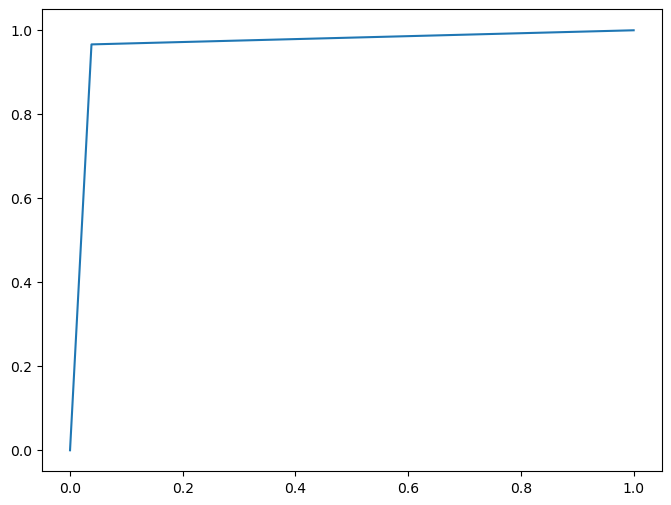

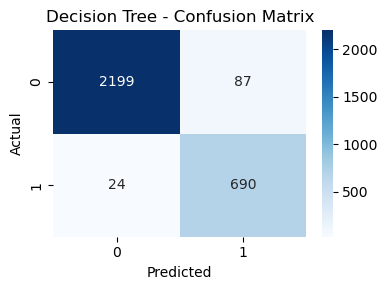

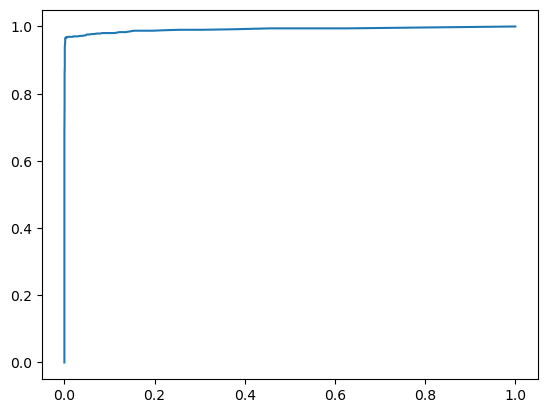

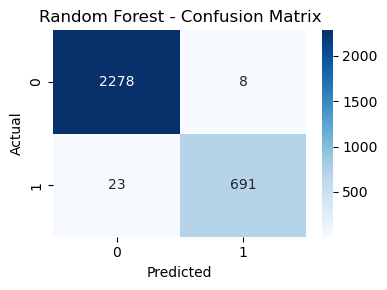

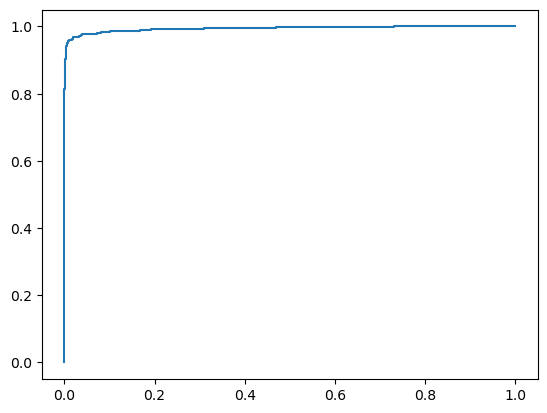

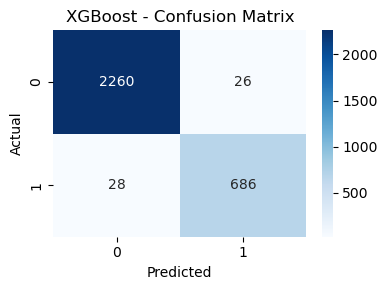

In [15]:
# ================== 4. Train & Evaluate ==================
results = {}

# ROC Curve Figure
plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    # Metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
    # Confusion Matrix (Separate Figure)
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15040\1501147698.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


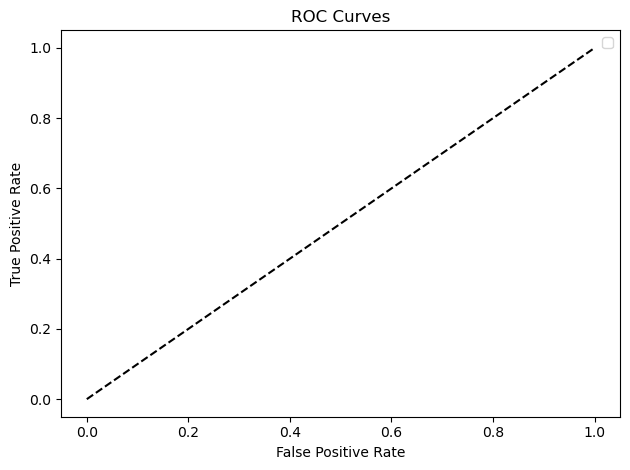

In [17]:
# ROC Curve Plot (All Models)
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()


=== Models Performance ===
               Accuracy  Precision    Recall  F1-score   ROC-AUC
Decision Tree  0.963000   0.888031  0.966387  0.925553  0.964164
Random Forest  0.989667   0.988555  0.967787  0.978061  0.991513
XGBoost        0.982000   0.963483  0.960784  0.962132  0.993831


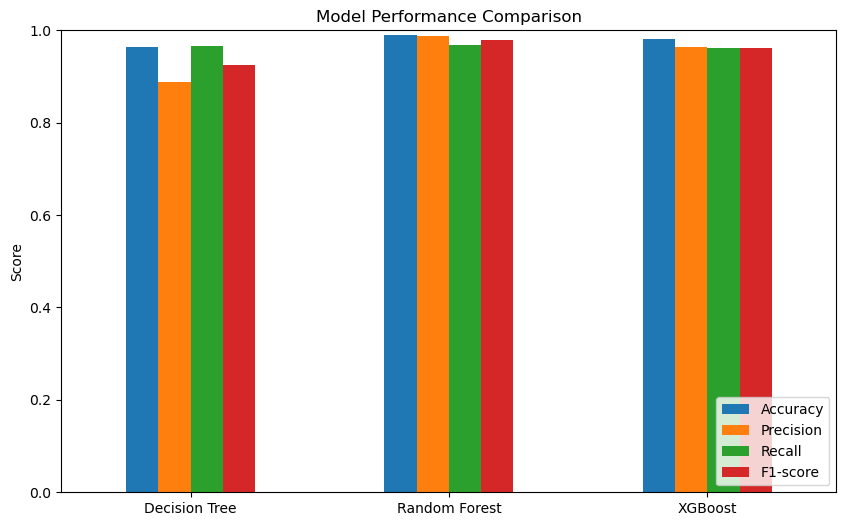

In [21]:
# ================== 5. Results Comparison ==================
results_df = pd.DataFrame(results).T
print("\n=== Models Performance ===")
print(results_df)

# Bar Chart for Model Comparison
results_df[['Accuracy','Precision','Recall','F1-score']].plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.show()

In [23]:
# ================== 6. Cross-Validation ==================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    print(f"{name} - Cross-Validation F1 Mean: {cv_scores.mean():.4f}")


Decision Tree - Cross-Validation F1 Mean: 0.9692
Random Forest - Cross-Validation F1 Mean: 0.9839
XGBoost - Cross-Validation F1 Mean: 0.9848


C:\Users\user\AppData\Local\Temp\ipykernel_15040\3531443990.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette="viridis")


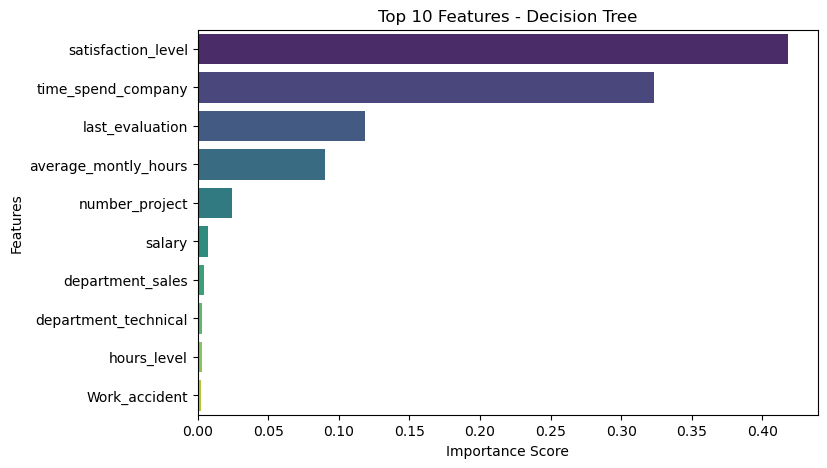

C:\Users\user\AppData\Local\Temp\ipykernel_15040\3531443990.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette="viridis")


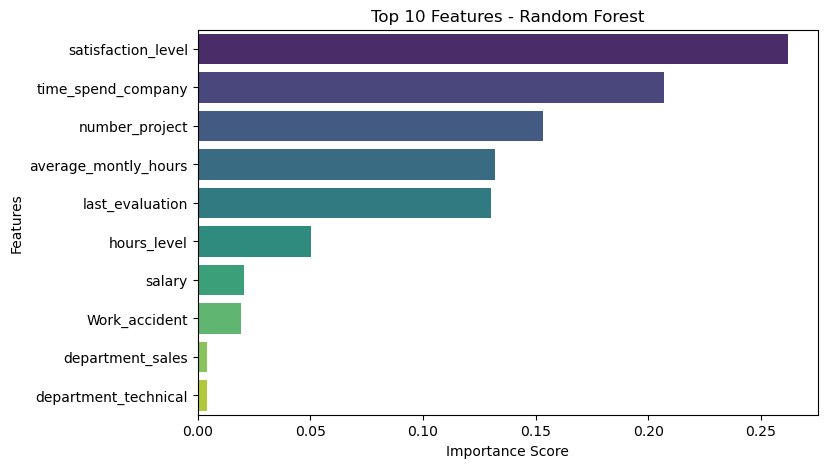

C:\Users\user\AppData\Local\Temp\ipykernel_15040\3531443990.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette="viridis")


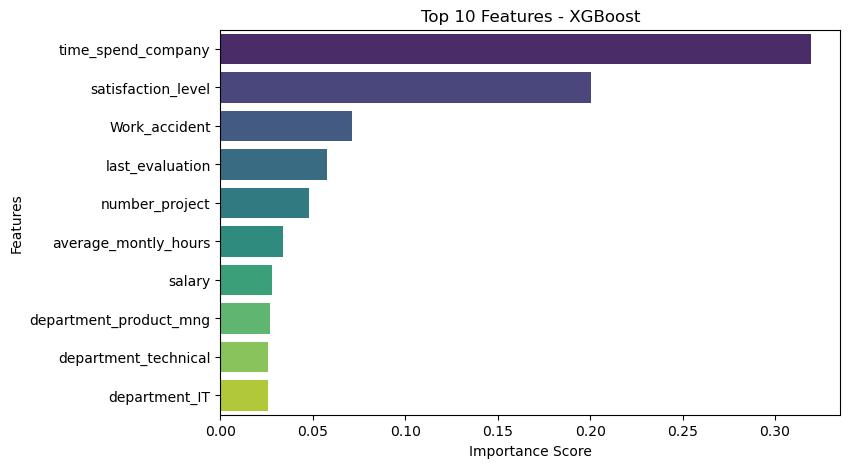

In [25]:
# ================== 7. Feature Importance ==================
for name, model in models.items():
    if hasattr(model, "feature_importances_"):
        importances = pd.Series(model.feature_importances_, index=X_train.columns)
        top_features = importances.sort_values(ascending=False).head(10)
        plt.figure(figsize=(8, 5))
        sns.barplot(x=top_features, y=top_features.index, palette="viridis")
        plt.title(f"Top 10 Features - {name}")
        plt.xlabel("Importance Score")
        plt.ylabel("Features")
        plt.show()

In [27]:
# ================== 8. Select Top 2 Models ==================
top_models = results_df.sort_values(by="F1-score", ascending=False).head(2)
print("\n=== Top 2 Models ===")
print(top_models)



=== Top 2 Models ===
               Accuracy  Precision    Recall  F1-score   ROC-AUC
Random Forest  0.989667   0.988555  0.967787  0.978061  0.991513
XGBoost        0.982000   0.963483  0.960784  0.962132  0.993831


In [45]:
# Save Models
for model_name in top_models.index:
    save_dict = {
        "model": models[model_name],
        "features": list(X_train.columns)  
    }
    joblib.dump(save_dict, f"{model_name.replace(' ', '_')}_model.pkl")
print("\nTop 2 models (with features) saved successfully.")



Top 2 models (with features) saved successfully.
